Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 018
Code Title: | Emerging Technologies in CpE 1 - Fundamentals of Computer Vision
1st Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY NO. 2**</u> | <u>**Basic I/O Scripting, Part 1**</u>
**Name** | Baconawa, Joshua
**Section** | CPE32S8
**Date Performed**: | Feb. 20, 2024
**Date Submitted**: | Feb. 20, 2024
**Instructor**: | Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to introduce students to the OpenCV's I/O functionality.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Read and write an image file
* Convert between image and raw bytes
* Access image data with numpy.array

## 3. Procedures and Outputs

Most CV applications need to get images as input. Most also produce images as output. An interactive CV application might require a camera as an input source
and a window as an output destination. However, other possible sources and destinations include image files, video files, and raw bytes.

For example, raw bytes might be transmitted via a network connection, or they might be generated by an
algorithm if we incorporate procedural graphics into our application. Let's look at each of these possibilities.

### 4.1 Reading and Writing Image Files

OpenCV provides the ```imread()``` and ```imwrite()``` functions that support various file formats for still images. The supported formats vary by system but should always include the BMP format. Typically, PNG, JPEG, and TIFF should be among the supported formats too. Let's explore the anatomy of the representation of an image in Python and NumPy. No matter the format, each pixel has a value, but the difference is in how the pixel is represented.

For example, we can create a black square image from scratch by simply creating a 2D NumPy array:

In [ ]:
# Uncomment if you encounter an error importing numpy
# !pip install numpy

In [ ]:
import numpy as np

img = np.zeros((3,3), dtype=np.uint8)

If we print this image to a console, we obtain the following result:

In [ ]:
img

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

Each pixel is represented by a single 8-bit integer, which means that the values for each pixel are in the 0-255 range.

Let's now convert this image into Blue-green-red (BGR)

In [ ]:
import cv2

img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

**What changes can you observe when you print ```img```?**

In [ ]:
print(img)

""" I observed that when I printed img, it prints three 3x3 channels which I think represents the pixels of BGR."""

[[[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]]


' I observed that when I printed img, it prints three 3x3 channels which I think represents the pixels of BGR.'

<hr/>

You can check the structure of an image by inspecting the shape property, which returns rows, columns, and the number of channels (if there is more than one).

Consider this example:

In [ ]:
img = np.zeros((3,3), dtype=np.uint8)
img.shape

(3, 3)

If you then converted the image to BGR, the shape would be (3,3,3), which indicates the presence of three channels per pixel.

Images can be loaded from one file format and saved to another. For example, let's convert an image from PNG to JPEG:

In [ ]:
image = cv2.imread('swolevscheems.png')
cv2.imwrite('swolevscheems.jpg', image)

True

By default, imread() returns an image in the BGR color format even if the file uses a grayscale format. BGR represents the same color space as red-green-blue (RGB), but the byte order is reversed.

Optionally, we may specify the mode of imread() to be one of the following enumerators:
* ```IMREAD_ANYCOLOR = 4```
* ```IMREAD_ANYDEPTH = 2```
* ```IMREAD_COLOR = 1```
* ```IMREAD_GRAYSCALE = 0```
* ```IMREAD_LOAD_GDAL = 8```
* ```IMREAD_UNCHANGED = -1```

For example, let's load a PNG file as a grayscale image (losing any color information in the process), and then, save it as a grayscale PNG image:

In [ ]:
grayImage = cv2.imread('swolevscheems.png', cv2.IMREAD_GRAYSCALE)
cv2.imwrite('GrayCheems.png', grayImage)

True

*Note: Regardless of the mode, imread() discards any alpha channel (transparency). The imwrite() function requires an image to be in the BGR or grayscale format with a certain number of bits per channel that the output format can support. For example,
bmp requires 8 bits per channel, while PNG allows either 8 or 16 bits per channel.*

### 4.2 Converting between an image and raw bytes

Conceptually, a byte is an integer ranging from 0 to 255. In all real-time graphic applications today, a pixel is typically represented by one byte per channel, though other representations are also possible.

An OpenCV image is a 2D or 3D array of the .array type. An 8-bit grayscale image is a 2D array containing byte values. A 24-bit BGR image is a 3D array, which also contains byte values. We may access these values by using an expression, such as ```image[0, 0]``` or ```image[0, 0, 0]```. The first index is the pixel's y coordinate or row, 0 being the top. The second index is the pixel's x coordinate or column, 0 being the leftmost. The third index (if applicable) represents a color channel.

For example, in an 8-bit grayscale image with a white pixel in the upper-left corner,
```image[0, 0]``` is 255. For a 24-bit BGR image with a blue pixel in the upper-left
corner, ```image[0, 0]``` is ```[255, 0, 0]```.

Provided that an image has 8 bits per channel, we can cast it to a standard Python bytearray, which is one-dimensional:

In [ ]:
byteArray = bytearray(image)

Conversely, provided that ```bytearray``` contains bytes in an appropriate order, we can cast and then reshape it to get a ```numpy.array``` type that is an image. As a more complete example, let's convert bytearray, which contains random bytes to a grayscale image and a BGR image:

In [ ]:
import os

# Make an array of 120,000 random bytes
randomByteArray = bytearray(os.urandom(120000))
flatNumpyArray = np.array(randomByteArray)

# Convert the array to make a 400x300 grayscale image
grayImage = flatNumpyArray.reshape(300,400)
cv2.imwrite('RandomGray.png', grayImage)

# Convert the array to make a 400x100 color image
bgrImage = flatNumpyArray.reshape(100,400,3)
cv2.imwrite('RandomColor.png', bgrImage)

True

After running this script, we should have a pair of randomly generated images, RandomGray.png and RandomColor.png, in the script's directory.

### 4.3 Accessing image data with numpy.array

Now that you have a better understanding of how an image is formed, we can start performing basic operations on it. We know that the easiest (and most common) way to load an image in OpenCV is to use the imread function. We also know that this will return an image, which is really an array (either a 2D or 3D one, depending on
the parameters you passed to imread()).

The y.array structure is well optimized for array operations, and it allows certain kinds of bulk manipulations that are not available in a plain Python list. These kinds of .array type-specific operations come in handy for image manipulations in OpenCV.

Let's explore image manipulations from the start and step by step though, with a basic example: say you want to manipulate a pixel at the coordinates, (0, 0), of a BGR image and turn it into a white pixel.

In [ ]:
img = cv2.imread('swolevscheems.png')
img[0:25, 0:25] = [0,0,0]

If you then showed the image with a standard imshow() call, you will see a black square in the top-left corner of the image. Naturally, this isn't very useful, but it shows what can be accomplished. Let's now leverage the ability of numpy.array to operate transformations to an array much faster than a plain Python array.

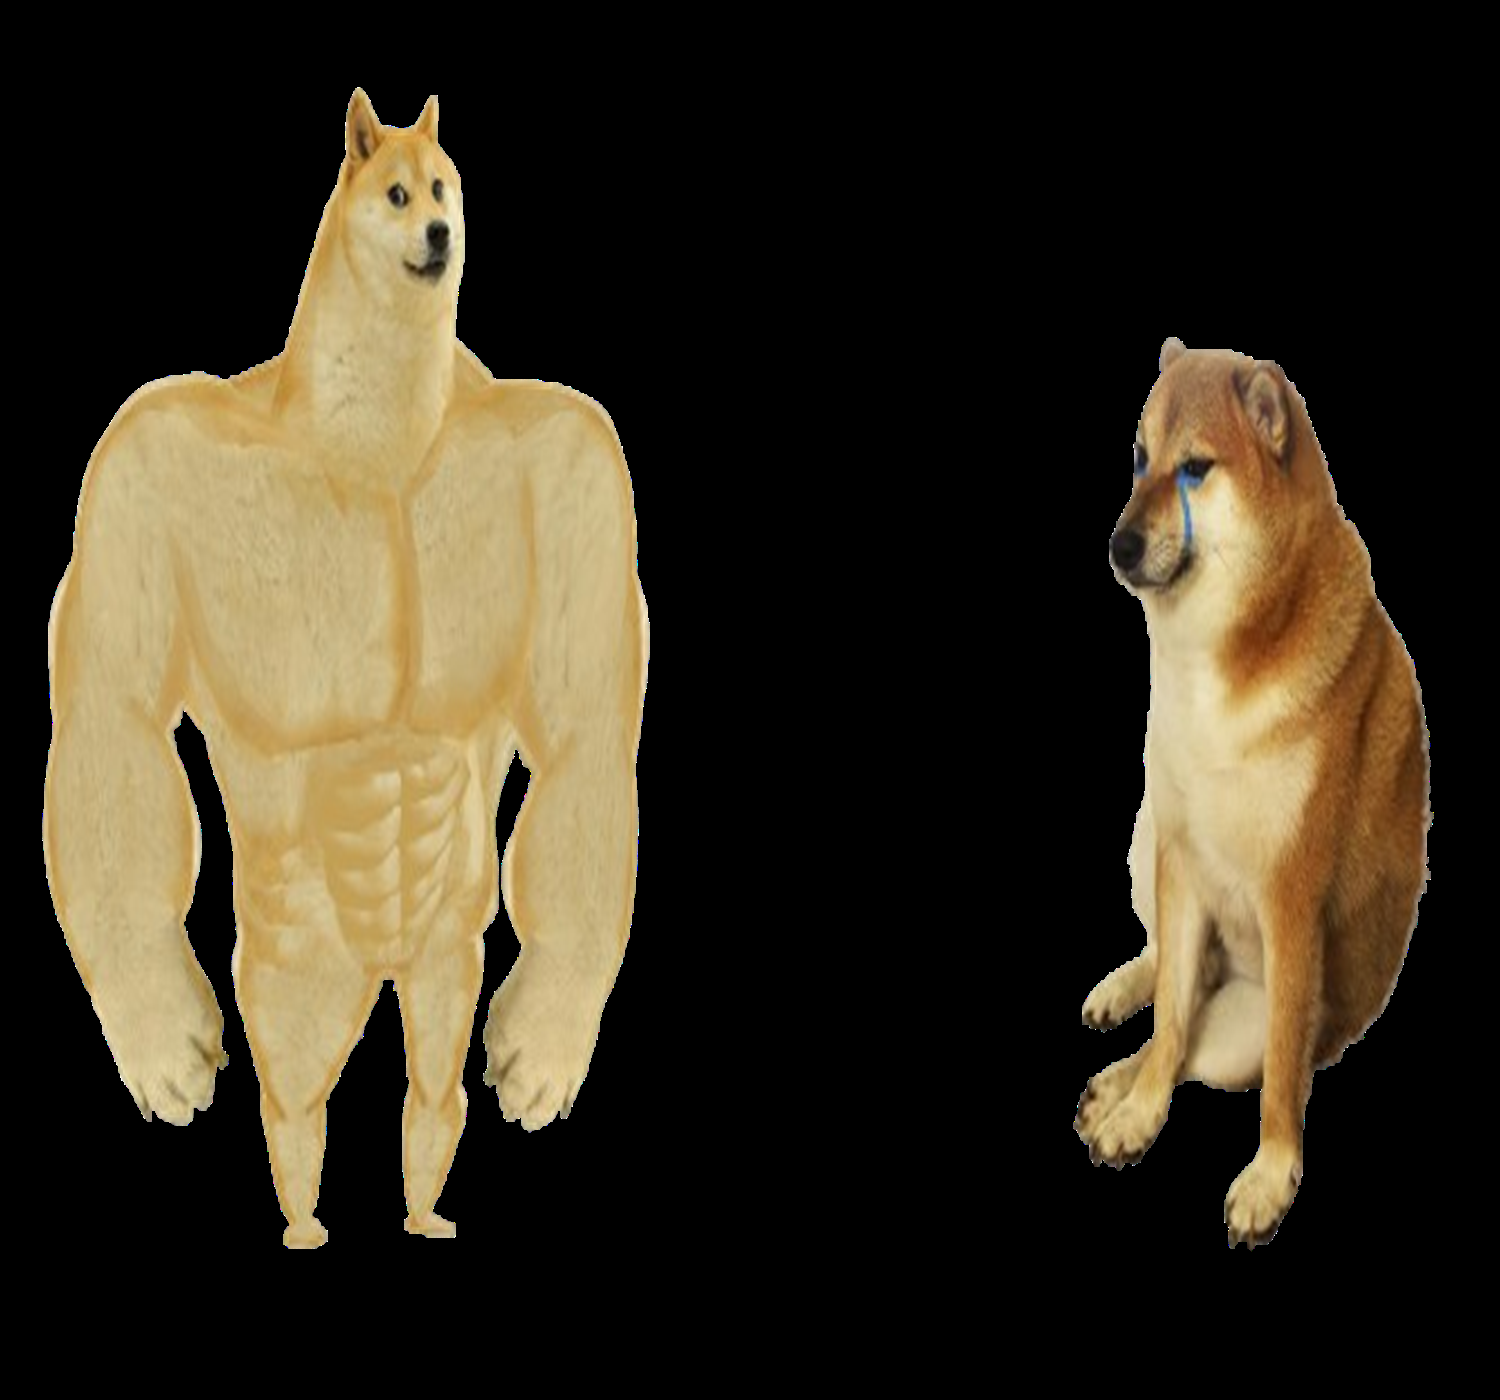

In [ ]:
# cv2.imshow('swolevscheems.png')

# If running in Colab, uncomment code above and comment the codes below
from google.colab.patches import cv2_imshow

# img = cv2.imread('swolevscheems.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

Let's say that you want to change the blue value of a particular pixel, for example, the pixel at coordinates, (150, 120). The ```numpy.array``` type provides a very handy method, item(), which takes three parameters: the x (or left) position, y (or top), and the index within the array at (x, y) position (remember that in a BGR image, the data at a certain position is a three-element array containing the B, G, and R values in this order) and returns the value at the index position. Another ```itemset()``` method sets the value of a particular channel of a particular pixel to a specified value (```itemset()``` takes two arguments: a three-element tuple (x, y, and index) and the new value).

In this example, we will change the value of blue at (150, 120) from its current value to an arbitrary 127:

In [ ]:
import cv2
import numpy as np

img = cv2.imread('swolevscheems.png')
print(img.item(150,120,0))

0


In [ ]:
img.itemset((150,120,0), 127)
print(img.item(150,120,0))

127


Remember that we do this with ```numpy.array``` for two reasons: ```numpy.array``` is an extremely optimized library for these kind of operations, and because we obtain more readable code through NumPy's elegant methods rather than the raw index access of the first example.

This particular code doesn't do much in itself, but it does open a world of possibilities. It is, however, advisable that you utilize built-in filters and methods to manipulate an entire image; the above approach is only suitable for small regions of interest.

Now, let's take a look at a very common operation, namely, manipulating channels. Sometimes, you'll want to zero-out all the values of a particular channel (B, G, or R).

This is a fairly impressive piece of code and easy to understand. The relevant line is the last one, which basically instructs the program to take all pixels from all rows and columns and set the resulting value at index one of the three-element array, representing the color of the pixel to 0. If you display this image, you will notice a
complete absence of green.

There are a number of interesting things we can do by accessing raw pixels with NumPy's array indexing; one of them is defining regions of interests (ROI). Once the region is defined, we can perform a number of operations, namely, binding this region to a variable, and then even defining a second region and assigning it the value of the first one (visually copying a portion of the image over to another
position in the image):

In [ ]:
img = cv2.imread('swolevscheems.png')
my_roi = img[0:100, 0:100]
img[300:400, 300:400] = my_roi

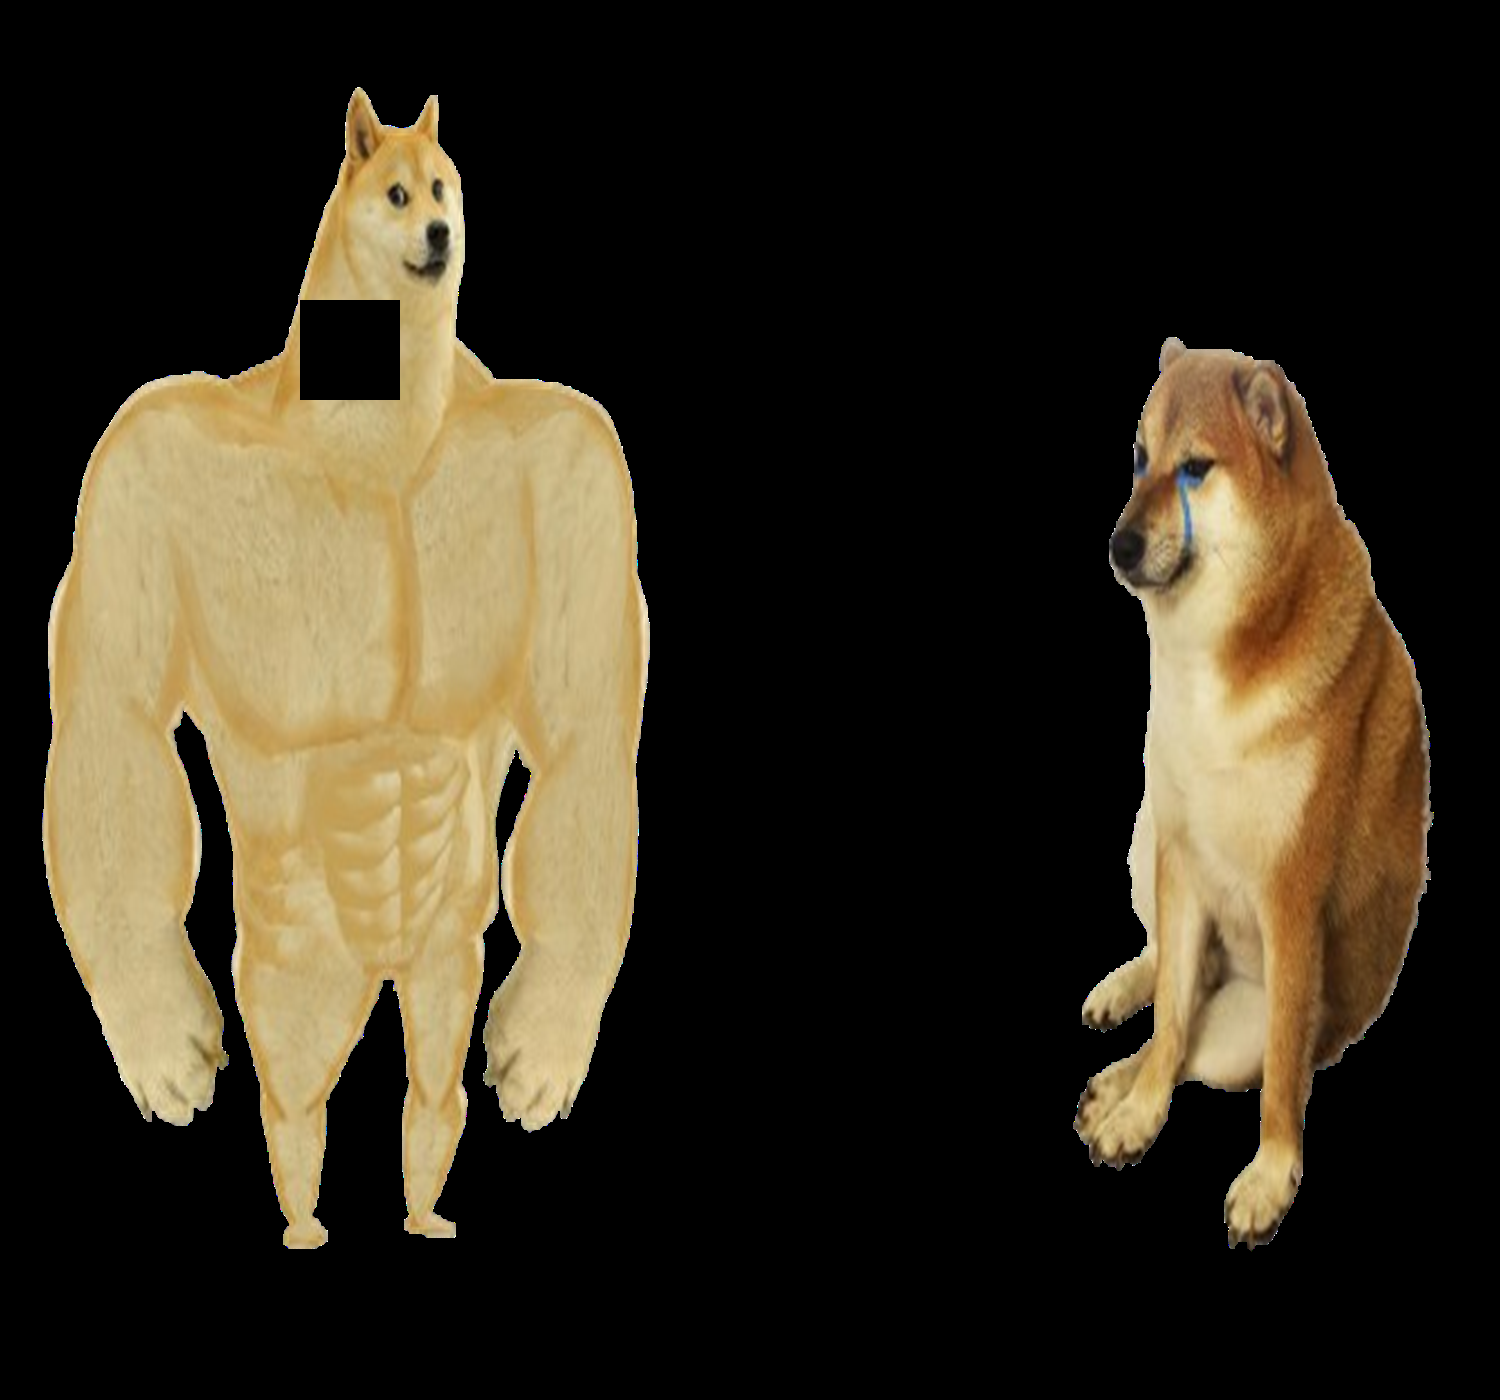

In [ ]:
# Display the image with the roi indicated as shown in the code above
cv2_imshow(img)

It's important to make sure that the two regions correspond in terms of size. If not, NumPy will (rightly) complain that the two shapes mismatch.

Finally, there are a few interesting details we can obtain from numpy.array, such as the image properties using this code:

In [ ]:
img = cv2.imread('swolevscheems.png')
print(img.shape)
print(img.size)
print(img.dtype)

(1400, 1500, 3)
6300000
uint8


These three properties are in this order:
* **Shape**: NumPy returns a tuple containing the width, height, and—if the image is in color—the number of channels. This is useful to debug a type of image; if the image is monochromatic or grayscale, it will not contain a channel's value.
* **Size**: This property refers to the size of an image in pixels.
* **Datatype**: This property refers to the datatype used for an image (normally a variation of an unsigned integer type and the bits supported by this type, that is, uint8).

All in all, it is strongly advisable that you familiarize yourself with NumPy in general and numpy.array in particular when working with OpenCV, as it is the foundation of an image processing done with Python.

## 4. Supplementary Activity

Perform the following tasks, add code blocks below to demonstrate each.

1. Load an RBG .png image of your favorite fictional character (animated is allowed). Make sure that they have a face that can be seen in the image.
2. Display the image.
3. Change the file type to .jpg then display the image.
4. Create a new image file that is a grayscale version of the original image from #1.
5. Use all 6 enumerators of the ```cv2.imread()``` function and provide an observation for each.
6. Experiment with values to obtain an ROI that captures the full face of your favorite character. Display this new image.
7. Save the new image from from #6 as "character_face.png".


In [ ]:
# 1.

image2sc = cv2.imread('scarecrow.png')

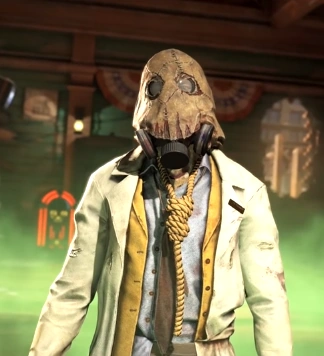

In [ ]:
# 2.

cv2_imshow(image2sc)

In [ ]:
# 3.

image2sc = cv2.imread('scarecrow.png')
cv2.imwrite('scarecrow.jpg', image2sc)

True

In [ ]:
# 4.

grayImage_sc = cv2.imread('scarecrow.png', cv2.IMREAD_GRAYSCALE)
cv2.imwrite('scarecrow.png', grayImage_sc)

True

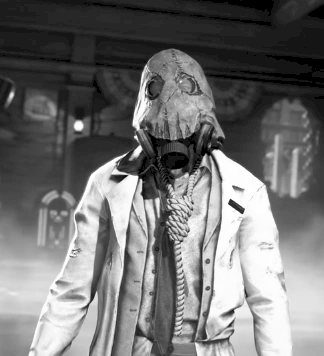

In [ ]:
cv2_imshow(grayImage_sc)

In [ ]:
# 5.

acImage_sc = cv2.imread('scarecrow.png', cv2.IMREAD_ANYCOLOR)
cv2.imwrite('scarecrow.png', acImage_sc)

True

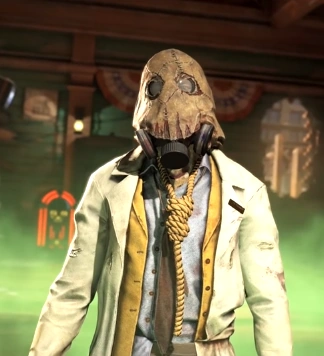

In [ ]:
cv2_imshow(acImage_sc)

In [ ]:
adImage_sc = cv2.imread('scarecrow.png', cv2.IMREAD_ANYDEPTH)
cv2.imwrite('scarecrow.png', adImage_sc)

True

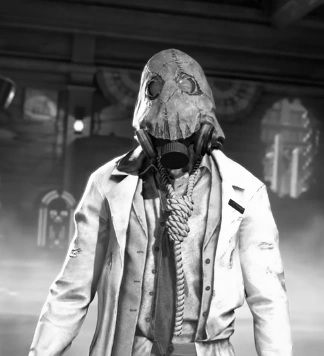

In [ ]:
cv2_imshow(adImage_sc)

In [ ]:
cImage_sc = cv2.imread('scarecrow.png', cv2.IMREAD_COLOR)
cv2.imwrite('scarecrow.png', cImage_sc)

True

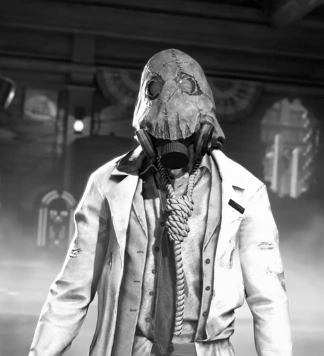

In [ ]:
cv2_imshow(cImage_sc)

In [ ]:
gsImage_sc = cv2.imread('scarecrow.png', cv2.IMREAD_GRAYSCALE)
cv2.imwrite('scarecrow.png', gsImage_sc)

True

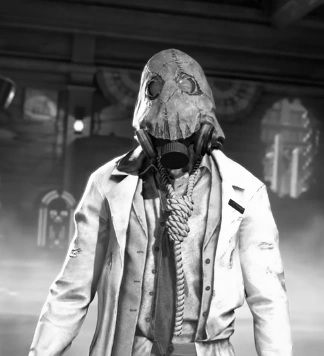

In [ ]:
cv2_imshow(gsImage_sc)

In [ ]:
lgImage_sc = cv2.imread('scarecrow.png', cv2.IMREAD_LOAD_GDAL)
cv2.imwrite('scarecrow.png', lgImage_sc)

True

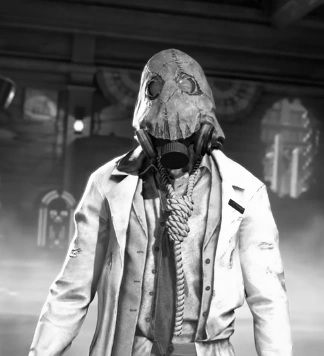

In [ ]:
cv2_imshow(lgImage_sc)

In [ ]:
unImage_sc = cv2.imread('scarecrow.png', cv2.IMREAD_UNCHANGED)
cv2.imwrite('scarecrow.png', unImage_sc)

True

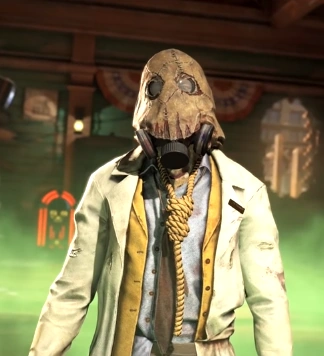

In [ ]:
cv2_imshow(unImage_sc)

In [ ]:
# 6.



## 5. Summary, Conclusions and Lessons Learned

In conclusion, I learned that each pixel is represented by a single 8-bit integer, which means that the values for each pixel are in the 0-255 range. If I then converted the image to BGR, the shape would be 3,3,3. As well as that  imread() returns an image in the BGR color format even if the file uses a grayscale format. Also, the imwrite() function requires an image to be in the BGR or grayscale format with a certain number of bits per channel.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*